ПРОЕКТ БАНКИ

СЕГМЕНТАЦИЯ ПОЛЬЗОВАТЕЛЕЙ ПО ПОТРЕБЛЕНИЮ

Ссылка на подготовленную презентацию: https://disk.yandex.ru/d/bg9JRaqKfWsFiw

ЦЕЛИ ПРОЕКТА:

Изучение клиентов регионального банка и сегментация пользователей по количеству потребляемых продуктов для анализа оттока клиентов

Данный анализ должен показать, как клиенты пользуются услугами банка и поможет составить портрет клиентов, которые склонны уходить из банка

ЗАДАЧИ ПРОЕКТА:

Предобработка данных

Проведение исследовательского анализа данных

Сегментация пользователей по количеству потребляемых продуктов

Формулирование и проверка статистических гипотез



ИСХОДНЫЕ ДАННЫЕ:

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:

'userid' — идентификатор пользователя

'score' — баллы кредитного скоринга

'City' — город

'Gender' — пол

'Age' — возраст

'Objects' — количество объектов в собственности

'Balance' — баланс на счёте

'Products' — количество продуктов, которыми пользуется клиент

'CreditCard' — есть ли кредитная карта

'Loyalty' — активный клиент

'estimated_salary' — заработная плата клиента

'Churn' — ушёл или нет



# Загрузка данных

In [1]:
#сразу импортируем необходимые нам библиотеки

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
import math as mth
import seaborn as sns
import scipy.stats as st
from plotly import graph_objects as go
import plotly.express as px
import json
import plotly.graph_objects as go
import matplotlib.colors as mcolors



In [2]:
#откроем файлы

if os.path.exists('/datasets/bank_dataset.csv'):
     data= pd.read_csv('/datasets/bank_dataset.csv')
else:
     data = pd.read_csv('bank_dataset.csv')

In [3]:
# посмотрим на исходную таблицу

data.head()

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#общая статистика датафрейма

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


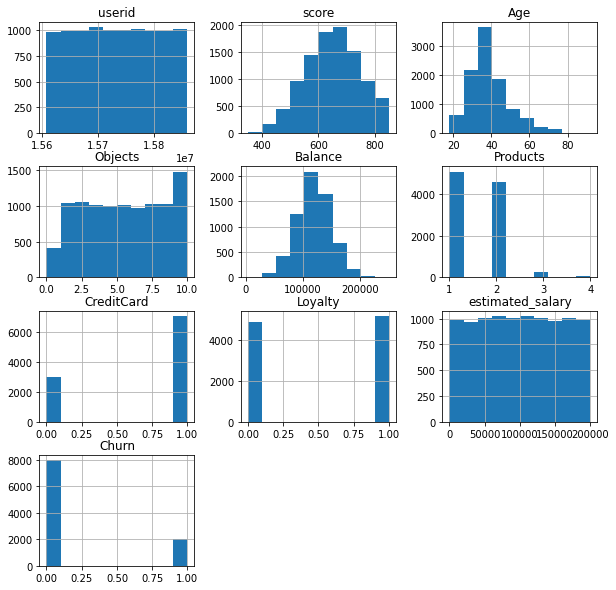

In [5]:
# построим гистограммы для всех столбцов датафрейма

data.hist(figsize=(10,10));

In [6]:
# посмотрим общую информацию о датафрейме

data.describe()

,userid,score,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.573368e+07,650.528800,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.560844e+07,350.000000,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.567126e+07,584.000000,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.573347e+07,652.000000,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.579597e+07,718.000000,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.585843e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


ВЫВОДЫ

В датасете присутствуют данные о 10 000 уникальных клиентов банка. Они относятся к трем городам:  Ярославлю, Рыбинску и Ростову Великому. Все клиенты совершеннолетние. БОльшая часть клиентов остаются верны банку и не уходят в отток. Клиенты имеют от 1 до 4 продуктов банка. Вызывает сомнения минимальная заработная плата клиента в 12 рублей, возможно стоит обратится в технический отдел банка, чтобы прояснить эту ситуацию. Так же наблюдаем пропуски в колонке с балансом на счете клиента, в дальнейшем посмотрим на этих пользователей, чтобы выяснить причину этих пропусков. 

# Предобработка данных

Как мы увидели из общей информации о датафрейме, с типом данных все в порядке.

Приведем названия столбцов к нижнему регистру:

In [7]:
data.columns=data.columns.str.lower()

In [8]:
# проверим результат

data.head()

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


Так же переименуем название столбца с уникальными пользователями банка:

In [9]:
data.rename(columns={'userid':'user_id'},inplace=True)

In [10]:
# проверим результат

data.head()

,user_id,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


In [11]:
# посмотрим на дубликаты

data.duplicated().sum()

0

Дубликатов в данных мы не обнаружили

In [12]:
#посмотрим на количество пропусков

data.isna().sum()

user_id                0
score                  0
city                   0
gender                 0
age                    0
objects                0
balance             3617
products               0
creditcard             0
loyalty                0
estimated_salary       0
churn                  0
dtype: int64

Мы наблюдаем большое количество пропусков в столбце 'balance' с балансом на счёте клиента

Можно предположить, что пропуски могли появится из-за следующих причин:

* технические причины - сбои при выгрузке данных

* клиент просто не имеет дебетовой карты, то есть дебетовый баланс может быть не у всех клиентов банка

Во втором случае система может считать, раз у клиентов нет дебетовой карты, то их баланс равен нулю

Можем посмотреть, что характерно для клиентов с пропусками в графе баланс

In [13]:
# создадим копию исходного датафрейма

data_new=data.copy()

Для удобства заменим NaN на нули в графе баланса клиентов

In [14]:
data_new['balance'].replace(np.nan, 0, inplace=True)

In [15]:
# проверим результат

data_new.head()

,user_id,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,0.00,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,0.00,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


Создадим отдельный датафрейм  data_null_balance только с теми клиентами, у которых ноль в графе баланс

In [16]:
data_null_balance=data_new[data_new['balance']==0]

In [17]:
data_null_balance.head()

,user_id,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,0.0,1,1,1,101348.88,1
3,15744090,699,Ярославль,Ж,39,1,0.0,2,0,0,93826.63,0
6,15635267,822,Ярославль,М,50,7,0.0,2,1,1,10062.80,0
11,15779909,497,Рыбинск,М,24,3,0.0,2,1,0,76390.01,0
12,15675000,476,Ярославль,Ж,34,10,0.0,2,1,0,26260.98,0


Теперь посмотрим, что может быть характерно для пользователей, у которых отсутствует баланс:

In [18]:
data_null_balance['score'].value_counts()

850    78
678    26
711    20
655    20
663    20
       ..
824     1
822     1
491     1
470     1
816     1
Name: score, Length: 434, dtype: int64

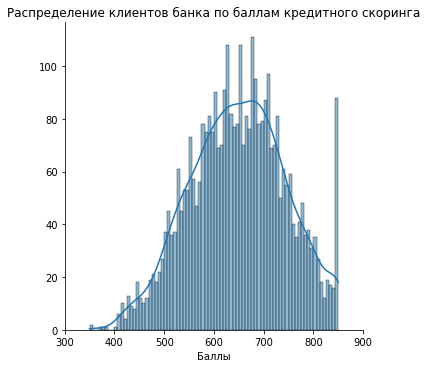

In [19]:
sns.displot(data_null_balance['score'], bins=80,kde=True)
sns.set_palette('Set2')
plt.xlim(300, 900)
plt.title('Распределение клиентов банка по баллам кредитного скоринга')
plt.xlabel('Баллы')
plt.ylabel('')
plt.show();

Такие пользователи имеют хорошие баллы кредитного скоринга

In [20]:
data_null_balance['city'].value_counts()

Ярославль    2418
Рыбинск      1199
Name: city, dtype: int64

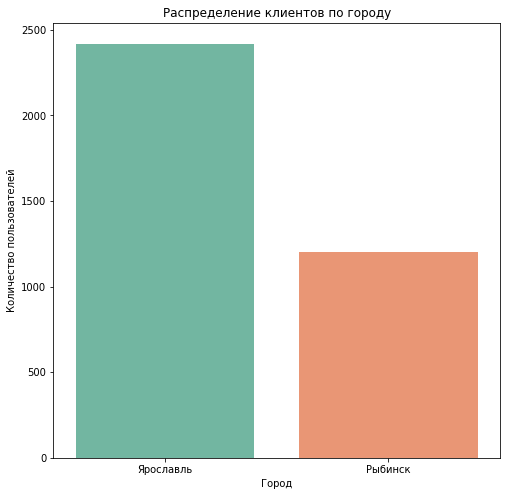

In [21]:
plt.figure(figsize=(8, 8))
sns.countplot(x = data_null_balance['city'], data=data_null_balance)
sns.set_palette('Set2')
plt.title('Распределение клиентов по городу')
plt.xlabel('Город')
plt.ylabel('Количество пользователей')
plt.show();

Клиенты с нулевым балансом проживают в двух городах: Ярославле и Рыбинске

In [22]:
data_null_balance['gender'].value_counts()

М    1963
Ж    1654
Name: gender, dtype: int64

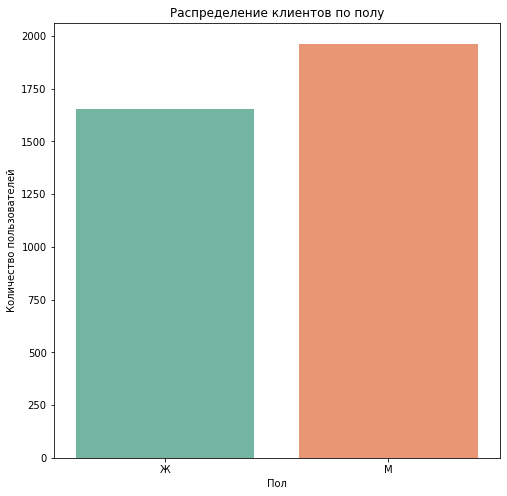

In [23]:
plt.figure(figsize=(8, 8))
sns.countplot(x = data_null_balance['gender'], data=data_null_balance)
sns.set_palette('Set2')
plt.title('Распределение клиентов по полу')
plt.xlabel('Пол')
plt.ylabel('Количество пользователей')
plt.show();

БОльшая часть таких клиентов - мужчины

In [24]:
data_null_balance['age'].value_counts()

34    178
36    176
38    175
35    172
37    168
     ... 
88      1
82      1
78      1
76      1
85      1
Name: age, Length: 67, dtype: int64

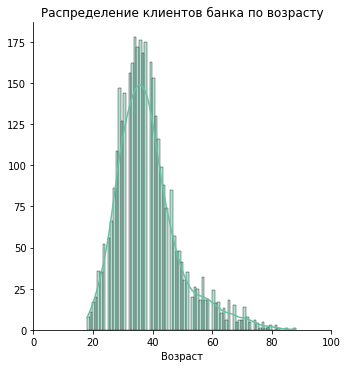

In [25]:
sns.displot(data_null_balance['age'], bins=80,kde=True)
sns.set_palette('Set2')
plt.xlim(0, 100)
plt.title('Распределение клиентов банка по возрасту')
plt.xlabel('Возраст')
plt.ylabel('')
plt.show();

В основном такие клиенты среднего возраста : 34-37 лет

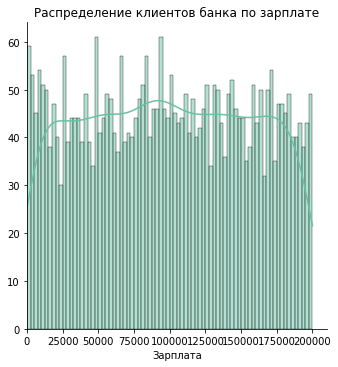

In [26]:
sns.displot(data_null_balance['estimated_salary'], bins=80,kde=True)
sns.set_palette('Set2')
plt.xlim(0, 210000)
plt.title('Распределение клиентов банка по зарплате')
plt.xlabel('Зарплата')
plt.ylabel('')
plt.show();

Зарплата таких клиентов распределена достаточно равномерно

In [27]:
data_null_balance['objects'].value_counts()

7     386
2     382
5     374
4     369
6     367
8     363
9     360
3     352
1     349
10    178
0     137
Name: objects, dtype: int64

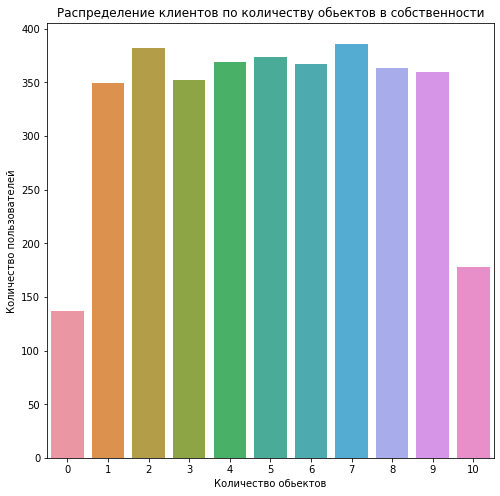

In [28]:
plt.figure(figsize=(8, 8))
sns.countplot(x = data_null_balance['objects'], data=data_null_balance)
sns.set_palette('Set2')
plt.title('Распределение клиентов по количеству обьектов в собственности')
plt.xlabel('Количество обьектов')
plt.ylabel('Количество пользователей')
plt.show();

У таких клиентов в основном у всех есть обьекты в собственности

In [29]:
data_null_balance['products'].value_counts()

2    2600
1     905
3      98
4      14
Name: products, dtype: int64

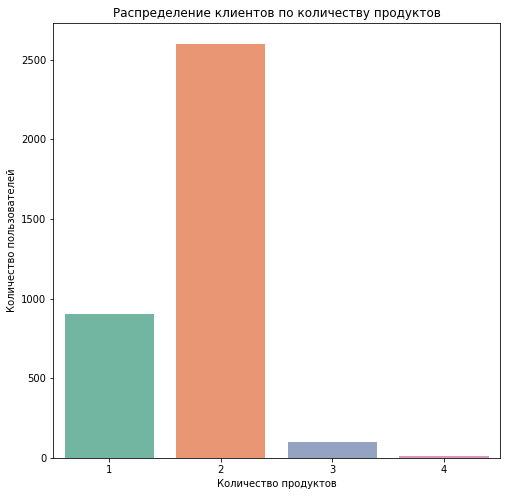

In [30]:
plt.figure(figsize=(8, 8))
sns.countplot(x = data_null_balance['products'], data=data_null_balance)
sns.set_palette('Set2')
plt.title('Распределение клиентов по количеству продуктов')
plt.xlabel('Количество продуктов')
plt.ylabel('Количество пользователей')
plt.show();

Большинство таких клиентов имеют два продукта банка

In [31]:
data_null_balance['creditcard'].value_counts()

1    2592
0    1025
Name: creditcard, dtype: int64

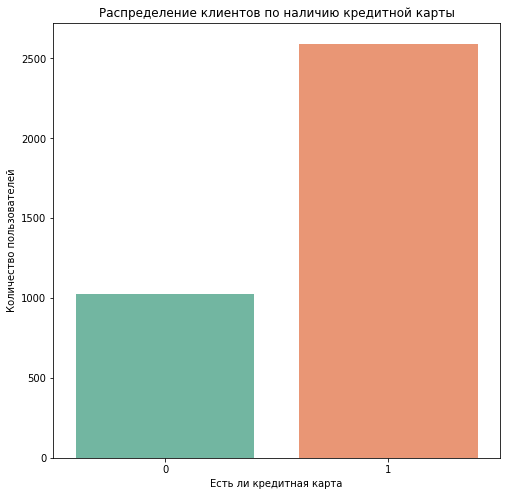

In [32]:
plt.figure(figsize=(8, 8))
sns.countplot(x = data_null_balance['creditcard'], data=data_null_balance)
sns.set_palette('Set2')
plt.title('Распределение клиентов по наличию кредитной карты')
plt.xlabel('Есть ли кредитная карта')
plt.ylabel('Количество пользователей')
plt.show();

Тут мы наблюдаем интересную картину: у большинства таких клиентов есть кредитная карта. Возможно, они предпочитают брать деньги в кредит и не иметь дебетовой карты, что как раз и иможет обьяснить пропуски в графе с балансом

In [33]:
data_null_balance['loyalty'].value_counts()

1    1873
0    1744
Name: loyalty, dtype: int64

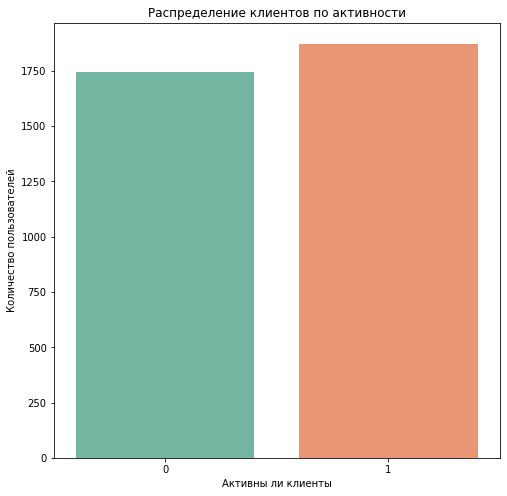

In [34]:
plt.figure(figsize=(8, 8))
sns.countplot(x = data_null_balance['loyalty'], data=data_null_balance)
sns.set_palette('Set2')
plt.title('Распределение клиентов по активности')
plt.xlabel('Активны ли клиенты')
plt.ylabel('Количество пользователей')
plt.show();

По активности таких клиентов почти одинаковое количество

In [35]:
data_null_balance['churn'].value_counts()

0    3117
1     500
Name: churn, dtype: int64

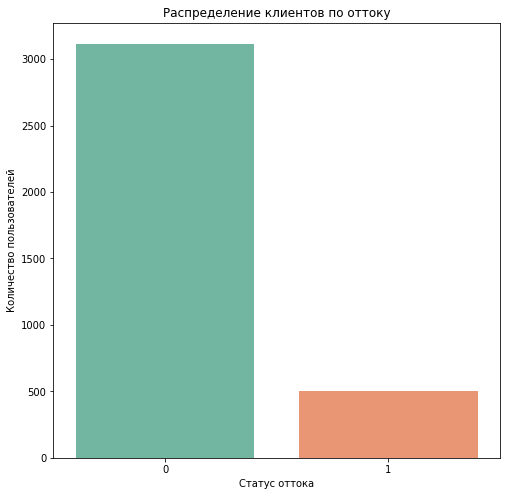

In [36]:
plt.figure(figsize=(8, 8))
sns.countplot(x = data_null_balance['churn'], data=data_null_balance)
sns.set_palette('Set2')
plt.title('Распределение клиентов по оттоку')
plt.xlabel('Статус оттока')
plt.ylabel('Количество пользователей')
plt.show();

Большинство таких клиентов остаются верны банку и не уходят в отток

ВЫВОДЫ

В результате предобработки данных названия столбцов были приведены к нижнему регистру, заменено навание столбца с уникальными пользователями банка.

Типы данных изменять не пришлось

Дубликатов в данных обнаружено не было

Что касается пропусков, было обнаружено большое количество пропусков в столбце с балансом клиента

Был создан отдельный датафрейм для изучения этих пропусков, в результате чего можно сделать следующие предположения :

* Вероятно, у таких пользователей нет дебетовой карты и система считает, что их баланс равен нулю

* Такие пользователи проживают в Ярославле и Рыбинске

* Такие пользователи имеют высокие баллы кредитного скоринга

* Большинство таких пользователей имеют кредитную карту

* БОльшая часть клиентов с нулевым балансом остается верна банку и не уходит в отток


# Исследовательский анализ данных

Еще раз взглянем на статистику датафрейма:

In [37]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,10000.0,1.573368e+07,71936.186123,15608437.00,1.567126e+07,1.573347e+07,1.579597e+07,15858426.00
score,10000.0,6.505288e+02,96.653299,350.00,5.840000e+02,6.520000e+02,7.180000e+02,850.00
age,10000.0,3.892180e+01,10.487806,18.00,3.200000e+01,3.700000e+01,4.400000e+01,92.00
objects,10000.0,5.012800e+00,2.892174,0.00,3.000000e+00,5.000000e+00,7.000000e+00,10.00
balance,6383.0,1.198275e+05,30095.056462,3768.69,1.001820e+05,1.198397e+05,1.395123e+05,250898.09
products,10000.0,1.530200e+00,0.581654,1.00,1.000000e+00,1.000000e+00,2.000000e+00,4.00
creditcard,10000.0,7.055000e-01,0.455840,0.00,0.000000e+00,1.000000e+00,1.000000e+00,1.00
loyalty,10000.0,5.151000e-01,0.499797,0.00,0.000000e+00,1.000000e+00,1.000000e+00,1.00
estimated_salary,10000.0,1.000902e+05,57510.492818,11.58,5.100211e+04,1.001939e+05,1.493882e+05,199992.48
churn,10000.0,2.037000e-01,0.402769,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1.00


Можно отметить следующее:

* Среднее значение баллов кредитного скоринга - 650. Это хороший показатель, вероятность в выдаче кредита таким пользоватлем высока

* Все клиенты совершеннолетние, средний возраст пользователей - 39 лет

* Максимальное количество обьектов в собственгости - 10, в среднем - 5

* Пользователи имеют от 1 до 4 продуктов банка, мы так же наблюдаем довольно большое стандартное отклонение, что говорит о большом разбросе 

* Среднее значение оттока - порядка 20 процентов, бОльшая часть клиентов все же остаются лояльными банку

Для начала взгялнем на распределение баллов кредитного скоринга среди клиентов банка

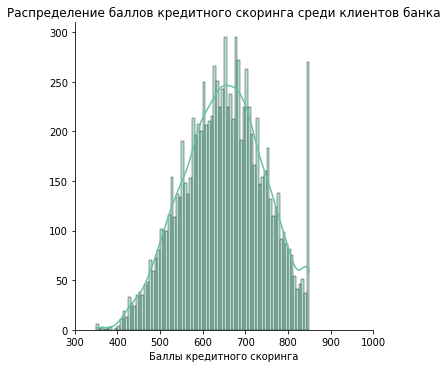

In [38]:
sns.displot(data['score'], bins=80,kde=True)
sns.set_palette('Set2')
plt.xlim(300, 1000)
plt.title('Распределение баллов кредитного скоринга среди клиентов банка')
plt.xlabel('Баллы кредитного скоринга')
plt.ylabel('')
plt.show();

Видно, что большинство клиентов имеют хорошие баллы кредитного скоринга и имеют высокие шансы получить кредит

Теперь посмотрим на возраст клиентов банка

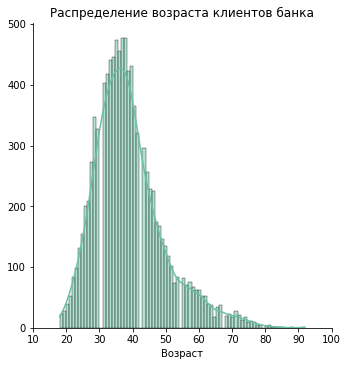

In [39]:
sns.displot(data['age'], bins=80,kde=True)
sns.set_palette('Set2')
plt.xlim(10, 100)
plt.title('Распределение возраста клиентов банка')
plt.xlabel('Возраст')
plt.ylabel('')
plt.show();

Основная масса клиентов - люди среднего возраста, в основном от 30 до 40 лет

Но встречаются и пожилые люди, вплоть до 92 лет


Что касается обьектов в собственности, наблюдаем следующую картину:

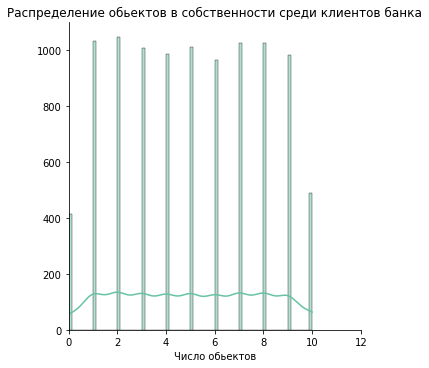

In [40]:
sns.displot(data['objects'], bins=80,kde=True) 
sns.set_palette('Set2')
plt.xlim(0, 12)
plt.title('Распределение обьектов в собственности среди клиентов банка')
plt.xlabel('Число обьектов')
plt.ylabel('')
plt.show();

Основная масса клиентов имеют обьекты в собственности, от 1 до 10

Есть люди, не имеющие обьектов в собственности, есть и те, у кого целых 10 обьектов, но таких клиентов немного

Заработная плата клиентов банка распределена достаточно равномерно, что подтверждает следующий график:

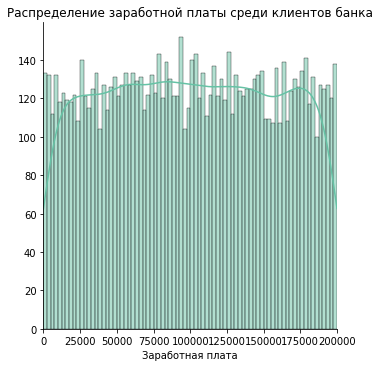

In [41]:
sns.displot(data['estimated_salary'], bins=80,kde=True) 
sns.set_palette('Set2')
plt.xlim(0, 200000)
plt.title('Распределение заработной платы среди клиентов банка')
plt.xlabel('Заработная плата')
plt.ylabel('')
plt.show();

Построим матрицу корреляций для нашего датафрейма, чтобы взглянть на зависимости параметров

Для категориальных признаков - пола и города применим метод get_dummies, чтобы более детально рассмотреть зависимости

Так как у нас присутствуют и числовые, и категориальные значения, применим кореляцию с методом Спирмена:

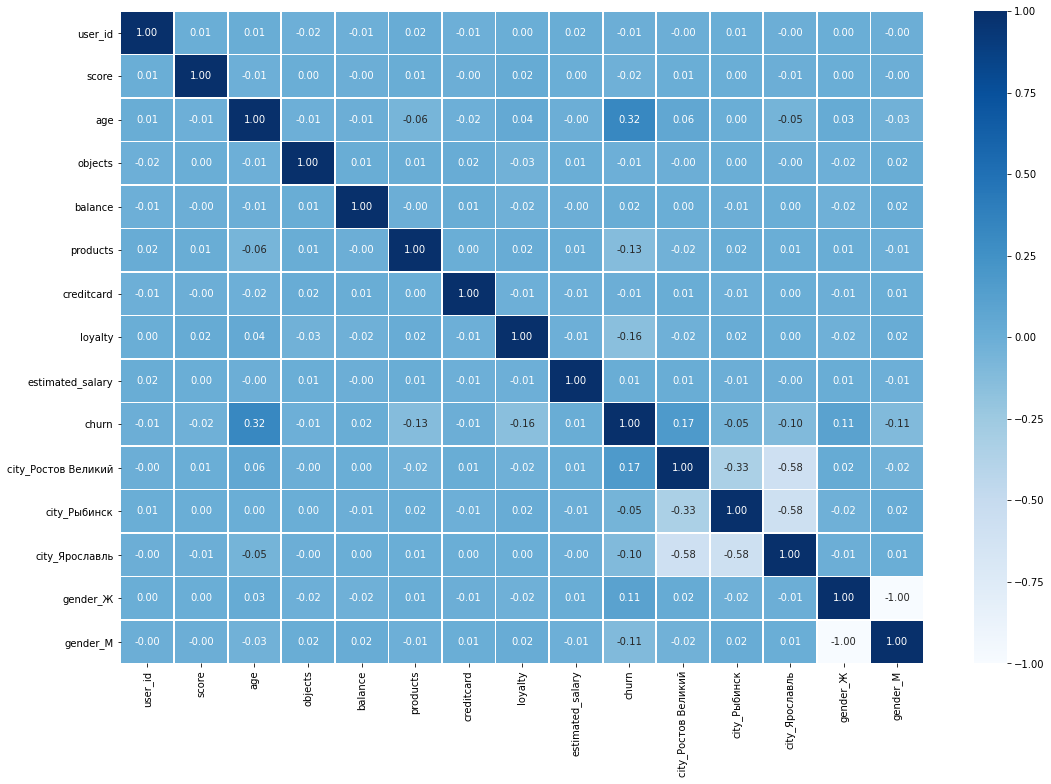

In [42]:
# построим тепловую карту корреляций

matrix_correlation = pd.get_dummies(data,columns=['city','gender']).corr(method='spearman')
plt.figure(figsize=(18, 12))
sns.heatmap(matrix_correlation , annot = True, fmt = '0.2f', linewidths=.8, cmap="Blues")
plt.show()

По матрице корреляций мы не наблюдаем большого числа параметров, оказывающих сильное вляиние друг на друга

Однако, стоит отметить некоторые моменты: 

* Наблюдается слабая корреляция между возрастом и оттоком клиентов из банка

* Так же мы видим очень слабую корреляцию между количеством продуктов, которыми пользуются пользователи и их оттоком из банка, а так же между активностью клиентов и оттоком

* Последняя корреляция наблюдается между количеством продуктов, которые используют клиенты, и их балансом в банке

* Есть небольшая коррелция между полом клиентов и оттоком. Женщины более склонны к оттоку, чем мужчины

* Так же видим корреляцию между городами и оттоком. Самый сильный отток - в Ростове Великом, самый слабый - в Рыбинске

Подробнее рассмотрим наблюдаемые зависимости

In [43]:
# посмотрим на отток в разрезе медианного возраста пользователей

data_churn_age=data.pivot_table(index='churn',values='age',aggfunc='median')
data_churn_age

,age
churn,
0,36
1,45


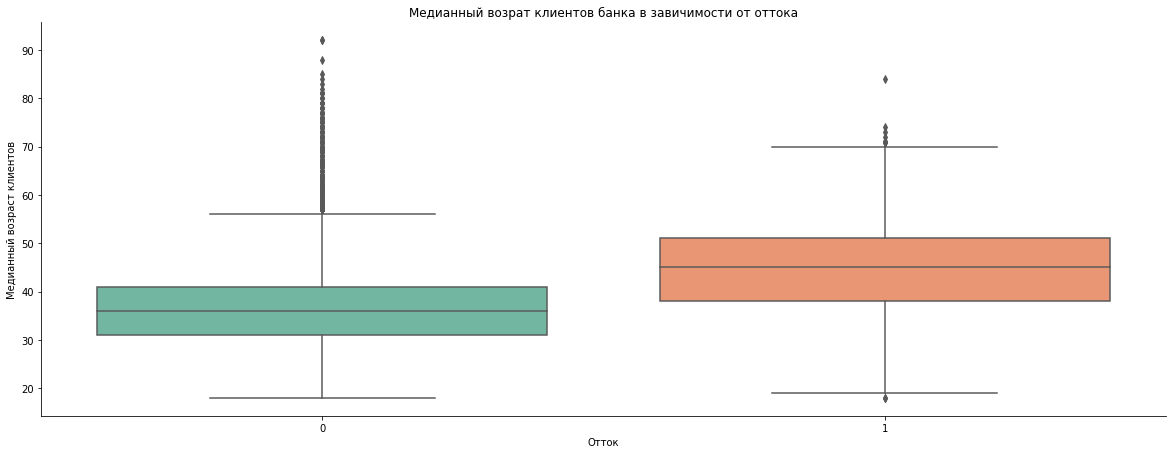

In [44]:
# построим график

sns.catplot(x='churn', y="age", kind="box", data=data, height=6, aspect=2.7)
sns.set_palette('Set2')
plt.xlabel("Отток")
plt.ylabel("Медианный возраст клиентов")
plt.title('Медианный возрат клиентов банка в завичимости от оттока');


Возраст клиентов, уходящих в отток, несколько выше, чем возраст клиентов, остаюшихся верными банку

Среди клиентов, остающихся верными банку, большое количество пожилых людей, впоть то 90 летнего возраста

In [45]:
# посмотрим на отток в разрезе количества продуктов у пользователей

data_churn_product=data.pivot_table(index='churn',columns='products',values='user_id',aggfunc='count')
data_churn_product

products,1,2,3,4
churn,,,,
0,3675.0,4242.0,46.0,NaN
1,1409.0,348.0,220.0,60.0


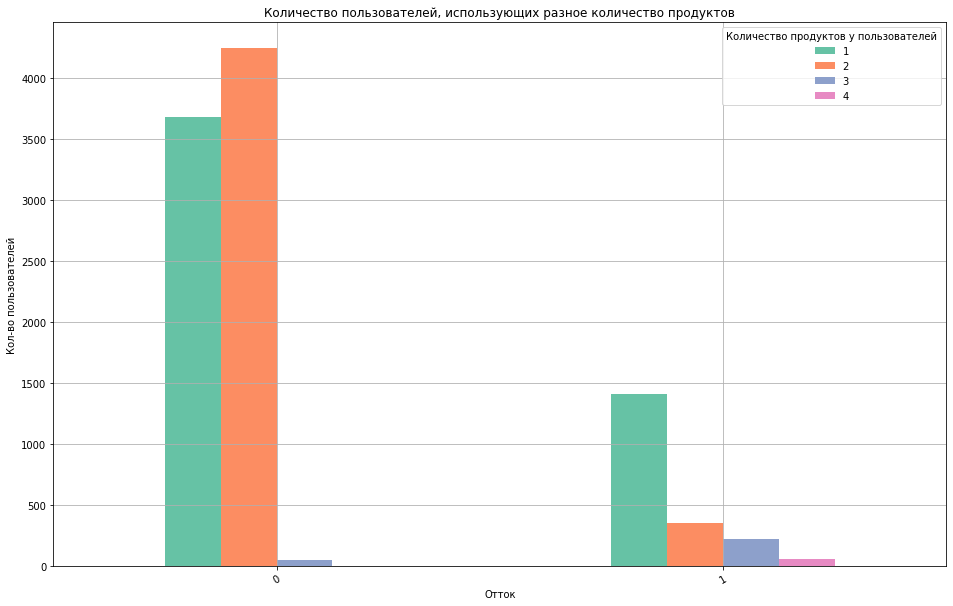

In [46]:
# построим график

data_churn_product.plot(kind='bar',grid=True,figsize=(16,10))
sns.set_palette('Set2')
plt.xlabel("Отток")
plt.ylabel("Кол-во пользователей")
plt.xticks(rotation=30)
plt.legend(title='Количество продуктов у пользователей')
plt.title("Количество пользователей, использующих разное количество продуктов");

Можем наблюдать следующее:

* Среди пользователей, остающихся верными банку, нет клиентов, которые пользуются четыремя продуктами. То есть те пользователи, которые используют 4 продукта банка, 100 процентов уходят из него

* Среди пользователей, которые верны банку, двумя продуктами пользуется большая часть, одним продуктом - чуть меньше, тремя продуктами - совсем малая часть клиентов

*  Среди ушедших из банка клиентов бОльшая часть пользовалась одним продуктом банка


Теперь изучим отток клиентов из банка в зависимости от их активности

In [47]:
# посмотрим на отток в разрезе активности пользователей

data_churn_loyalty=data.pivot_table(index='churn',columns='loyalty',values='user_id',aggfunc='count')
data_churn_loyalty

loyalty,0,1
churn,,
0,3547,4416
1,1302,735


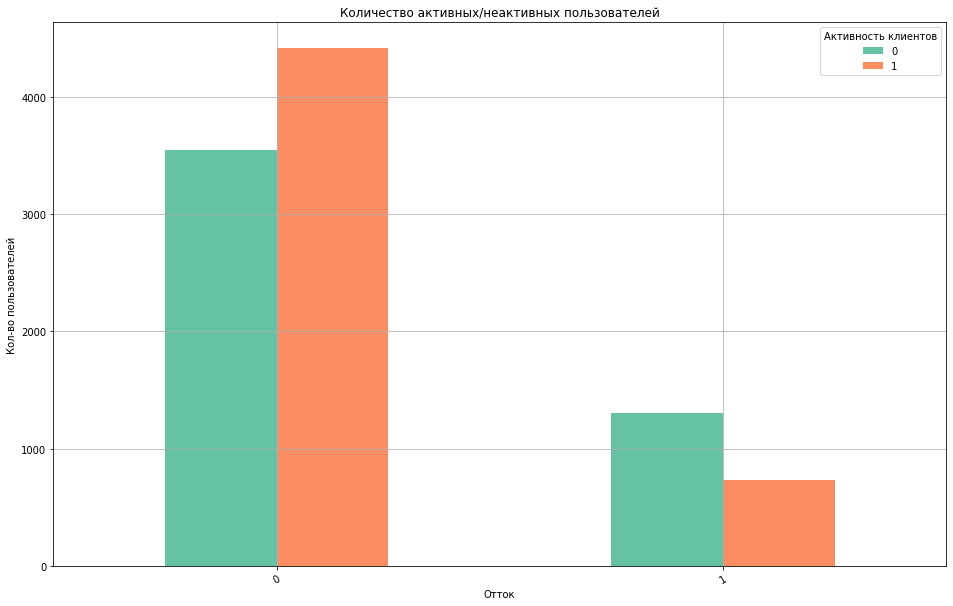

In [48]:
# построим график

data_churn_loyalty.plot(kind='bar',grid=True,figsize=(16,10))
sns.set_palette('Set2')
plt.xlabel("Отток")
plt.ylabel("Кол-во пользователей")
plt.xticks(rotation=30)
plt.legend(title='Активность клиентов')
plt.title("Количество активных/неактивных пользователей");

* Среди верных банку клиентов бОльшая часть - являются активными пользователями

* Среди ушедших из банка клиентов бОльшая часть была не активна



Что касается медианного баланса пользователей в зависимости от количества используемых продуктов банка, видим следующую картину:

In [49]:
# посмотрим на медианный баланс у пользователей в разрезе количества используемых продуктов банка

data_product_balance=data.pivot_table(index='products',values='balance',aggfunc='median')
data_product_balance

,balance
products,
1,119919.120
2,119762.245
3,118118.190
4,120968.270


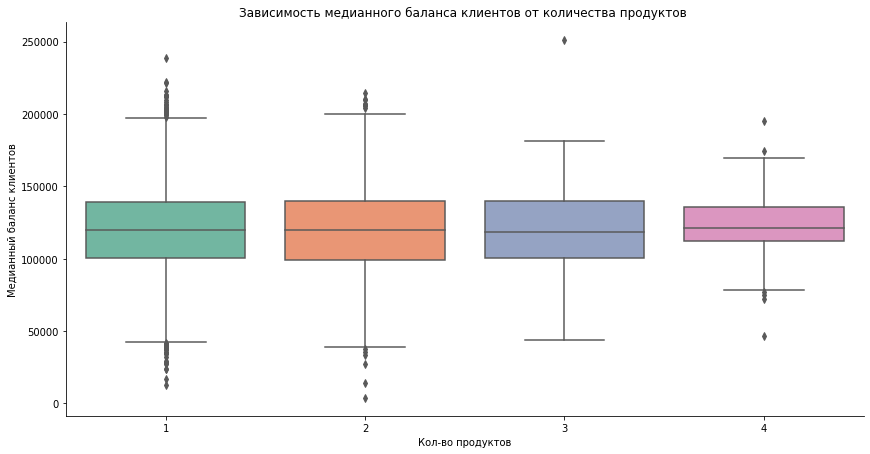

In [50]:
# построим график

sns.catplot(x='products', y="balance", kind="box", data=data, height=6, aspect=2)
plt.xlabel("Кол-во продуктов")
plt.ylabel("Медианный баланс клиентов")
plt.title("Зависимость медианного баланса клиентов от количества продуктов ");

*  Так как мы оставили пропуски в графе с балансом без изменений, то мы видим примерное равенство баланса по медианным значением 

* У пользователей с 1 и 2 продуктами банка большое количество выбросов значений баланса на счете

* Это значит, что у клиентов с 1 и 2 продуктами банка часто встречаются аномально большие или наоборот, аномальные невысокие значения баланса на счете

* У пользователей с тремя продуктами в пользовании почти нет выбросов в значениях баланса на счете


Посмотрим на зависимость оттока от пола клиентов

In [51]:
data_churn_pol=data.pivot_table(index='churn',columns='gender',values='user_id',aggfunc='count')
data_churn_pol

gender,Ж,М
churn,,
0,3404,4559
1,1139,898


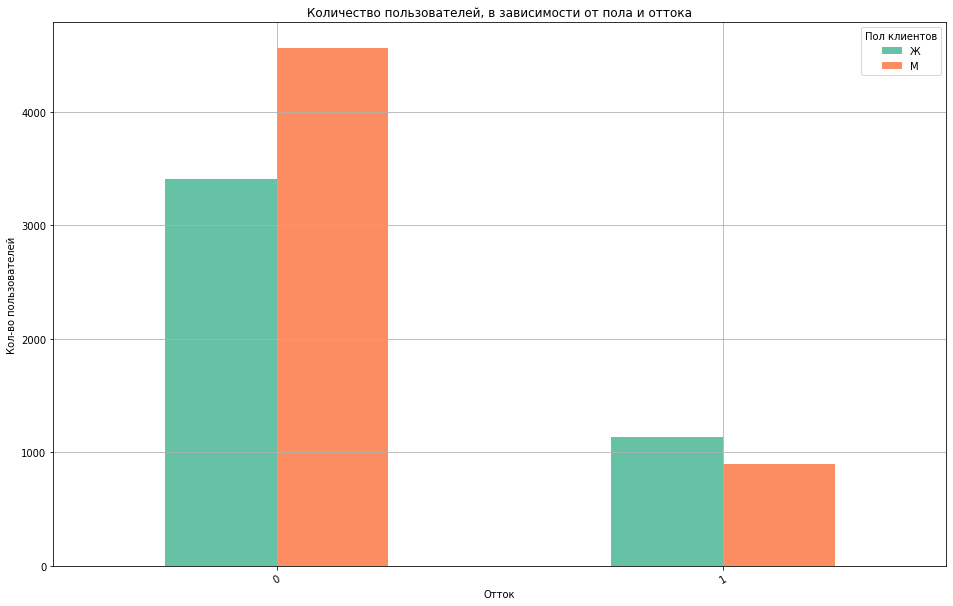

In [52]:
# построим график

data_churn_pol.plot(kind='bar',grid=True,figsize=(16,10))
sns.set_palette('Set2')
plt.xlabel("Отток")
plt.ylabel("Кол-во пользователей")
plt.xticks(rotation=30)
plt.legend(title='Пол клиентов')
plt.title("Количество пользователей, в зависимости от пола и оттока");

Как видно, женщины чуть более ухотно уходят в отток, мужчины обычно более верны банку

Теперь изучим отток в разрезе городов

In [53]:
data_churn_city=data.pivot_table(index='churn',columns='city',values='user_id',aggfunc='count')
data_churn_city

city,Ростов Великий,Рыбинск,Ярославль
churn,,,
0,1695,2064,4204
1,814,413,810


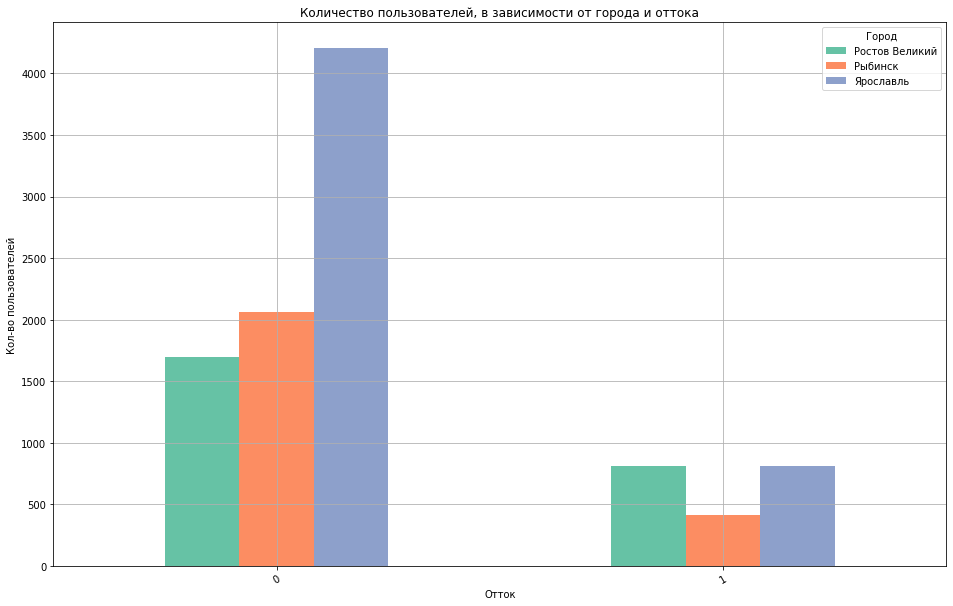

In [54]:
# построим график

data_churn_city.plot(kind='bar',grid=True,figsize=(16,10))
sns.set_palette('Set2')
plt.xlabel("Отток")
plt.ylabel("Кол-во пользователей")
plt.xticks(rotation=30)
plt.legend(title='Город')
plt.title("Количество пользователей, в зависимости от города и оттока");

Как видно из графика, в Ярославле в целом больше всего клиентов, но они наиболее верны банку

Среди уходящих в отток меньше всего пользователей из Рыбинска

# Сегментизация пользователей на основе данных о количестве потребляемых продуктов

Для начала посмотрим, как распределены клиенты по количеству продуктов 

In [55]:
data_products=data.groupby('products')['user_id'].count()

data_products

products
1    5084
2    4590
3     266
4      60
Name: user_id, dtype: int64

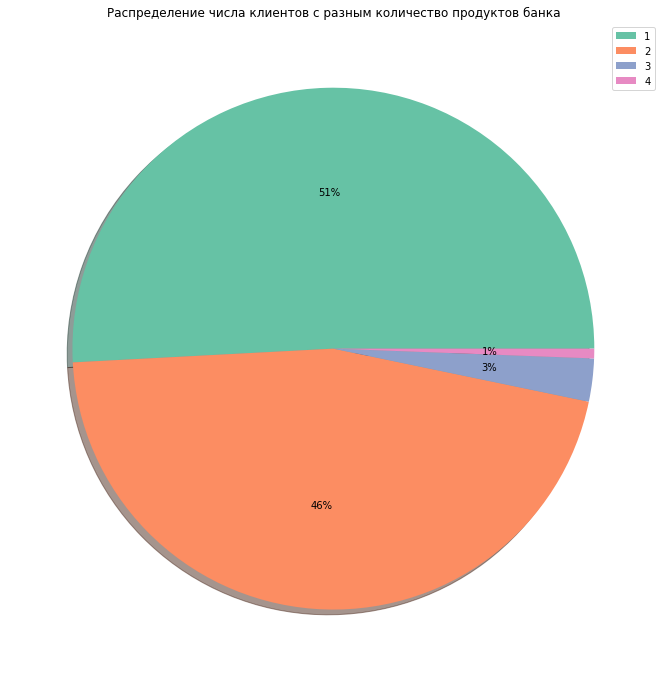

In [56]:
data_products.plot(kind='pie',autopct='%1.0f%%',labels=None,label='',figsize=(12, 12), shadow=True, legend=True)
sns.set_palette('Set2')
plt.title('Распределение числа клиентов с разным количество продуктов банка')
plt.show()

Как мы видим, большинство пользователей пользуется одним или двумя продуктами банка, 3 и 4 продуктами пользуется очень малое число клиентов

Создадим отдельные датафремы для пользователей с разным количеством продуктов банка:

In [57]:
# создаем отдельные датафреймы при помощи фильтрации

data_1=data.query('products==1')
data_2=data.query('products==2')
data_3_and_4=data.query('products==3|products==4')

Так как клиенты с 3 и 4 продуктами банка составляют малую долю от общего числа клиентов банка, обьединим их в один датафрейм data_3_and_4

Взглянем на общую статистику каждого сегмента

In [58]:
data_1.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,5084.0,1.573237e+07,72165.780479,15608437.00,1.566940e+07,15732061.00,1.579434e+07,15858426.00
score,5084.0,6.491210e+02,97.203710,350.00,5.810000e+02,651.00,7.170000e+02,850.00
age,5084.0,3.967309e+01,10.659566,18.00,3.200000e+01,38.00,4.500000e+01,92.00
objects,5084.0,4.974626e+00,2.914269,0.00,2.000000e+00,5.00,7.000000e+00,10.00
balance,4179.0,1.198942e+05,29804.134035,12459.19,1.004402e+05,119919.12,1.394421e+05,238387.56
products,5084.0,1.000000e+00,0.000000,1.00,1.000000e+00,1.00,1.000000e+00,1.00
creditcard,5084.0,7.037766e-01,0.456636,0.00,0.000000e+00,1.00,1.000000e+00,1.00
loyalty,5084.0,5.041306e-01,0.500032,0.00,0.000000e+00,1.00,1.000000e+00,1.00
estimated_salary,5084.0,9.948726e+04,57363.626412,11.58,5.041451e+04,99226.83,1.482127e+05,199970.74
churn,5084.0,2.771440e-01,0.447632,0.00,0.000000e+00,0.00,1.000000e+00,1.00


In [59]:
data_2.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,4590.0,1.573484e+07,71565.420386,15608450.00,1.567420e+07,1.573578e+07,1.579700e+07,15858381.00
score,4590.0,6.521887e+02,96.066831,350.00,5.860000e+02,6.530000e+02,7.190000e+02,850.00
age,4590.0,3.775359e+01,10.145663,18.00,3.100000e+01,3.600000e+01,4.200000e+01,92.00
objects,4590.0,5.051852e+00,2.867741,0.00,3.000000e+00,5.000000e+00,7.000000e+00,10.00
balance,1990.0,1.196609e+05,30647.376666,3768.69,9.917937e+04,1.197622e+05,1.395569e+05,214346.96
products,4590.0,2.000000e+00,0.000000,2.00,2.000000e+00,2.000000e+00,2.000000e+00,2.00
creditcard,4590.0,7.071895e-01,0.455102,0.00,0.000000e+00,1.000000e+00,1.000000e+00,1.00
loyalty,4590.0,5.328976e-01,0.498971,0.00,0.000000e+00,1.000000e+00,1.000000e+00,1.00
estimated_salary,4590.0,1.004520e+05,57790.799984,90.07,5.079729e+04,1.007389e+05,1.501515e+05,199992.48
churn,4590.0,7.581699e-02,0.264734,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1.00


In [60]:
data_3_and_4.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,326.0,1.573768e+07,73337.642601,15609048.00,1.567627e+07,1.573500e+07,1.580044e+07,15858226.00
score,326.0,6.491135e+02,96.200413,358.00,5.872500e+02,6.500000e+02,7.110000e+02,850.00
age,326.0,4.365337e+01,10.148108,21.00,3.700000e+01,4.300000e+01,5.000000e+01,77.00
objects,326.0,5.058282e+00,2.889713,0.00,3.000000e+00,5.000000e+00,8.000000e+00,10.00
balance,214.0,1.200743e+05,30697.506247,43772.66,1.026392e+05,1.200033e+05,1.389413e+05,250898.09
products,326.0,3.184049e+00,0.388120,3.00,3.000000e+00,3.000000e+00,3.000000e+00,4.00
creditcard,326.0,7.085890e-01,0.455111,0.00,0.000000e+00,1.000000e+00,1.000000e+00,1.00
loyalty,326.0,4.355828e-01,0.496595,0.00,0.000000e+00,0.000000e+00,1.000000e+00,1.00
estimated_salary,326.0,1.044001e+05,55759.764947,3440.47,6.434480e+04,1.038747e+05,1.511510e+05,199357.24
churn,326.0,8.588957e-01,0.348664,0.00,1.000000e+00,1.000000e+00,1.000000e+00,1.00


Создадим функцию def func для отрисовки графиков для разных сегментов

In [61]:
# создаем функцию для графиков

def func (dataset_1,dataset_2,dataset_3):
    
    plt.figure(figsize=(4, 3))
    sns.countplot(x = dataset_1['churn'], data=dataset_1).set_title('Распределение клиентов по оттоку,1 продукт')
    sns.set_palette('Set2')
    plt.xlabel('Отток')
    plt.ylabel('Количество пользователей')
    plt.show()
    plt.figure(figsize=(4, 3))
    sns.countplot(x = dataset_2['churn'], data=dataset_2).set_title('Распределение клиентов по оттоку,2 продукта')
    sns.set_palette('Set2')
    plt.xlabel('Отток')
    plt.ylabel('Количество пользователей')
    plt.show()
    plt.figure(figsize=(4, 3))
    sns.countplot(x = dataset_3['churn'], data=dataset_3).set_title('Распределение клиентов по оттоку,3-4 продукта')
    sns.set_palette('Set2')
    plt.xlabel('Отток')
    plt.ylabel('Количество пользователей')
    plt.show()
    
    
    plt.figure(figsize=(4, 3))
    sns.countplot(x = dataset_1['gender'], hue='churn', data=dataset_1).set_title('Распределение клиентов по полу,1 продукт')
    sns.set_palette('Set2')
    plt.xlabel('Пол')
    plt.ylabel('Количество пользователей')
    plt.legend(title='Отток')
    plt.legend(loc=1);
    plt.legend(bbox_to_anchor=(1, 1))
    plt.show()
    plt.figure(figsize=(4, 3))
    sns.countplot(x = dataset_2['gender'], hue='churn', data=dataset_2).set_title('Распределение клиентов по полу,2 продукта')
    sns.set_palette('Set2')
    plt.xlabel('Пол')
    plt.ylabel('Количество пользователей')
    plt.legend(title='Отток')
    plt.legend(loc=1);
    plt.legend(bbox_to_anchor=(1, 1))
    plt.show()
    plt.figure(figsize=(4, 3))
    sns.countplot(x = dataset_3['gender'], hue='churn', data=dataset_3).set_title('Распределение клиентов по полу,3-4 продукта')
    sns.set_palette('Set2')
    plt.xlabel('Пол')
    plt.ylabel('Количество пользователей')
    plt.legend(title='Отток')
    plt.legend(loc=1);
    plt.legend(bbox_to_anchor=(1, 1))
    plt.show()
    
    
    
    
    plt.figure(figsize=(5, 3))
    sns.countplot(x = dataset_1['city'], hue='churn', data=dataset_1).set_title('Распределение клиентов по городу,1 продукт')
    sns.set_palette('Set2')
    plt.xlabel('Город')
    plt.ylabel('Количество пользователей')
    plt.legend(title='Отток')
    plt.show()
    plt.figure(figsize=(5, 3))
    sns.countplot(x = dataset_2['city'], hue='churn', data=dataset_2).set_title('Распределение клиентов по городу,2 продукта')
    sns.set_palette('Set2')
    plt.xlabel('Город')
    plt.ylabel('Количество пользователей')
    plt.legend(title='Отток')
    plt.show()
    plt.figure(figsize=(5, 3))
    sns.countplot(x = dataset_3['city'], hue='churn', data=dataset_3).set_title('Распределение клиентов по городу,3-4 продукта')
    sns.set_palette('Set2')
    plt.xlabel('Город')
    plt.ylabel('Количество пользователей')
    plt.legend(title='Отток')
    plt.show()
    
    
    plt.figure(figsize=(5, 3))
    sns.countplot(x = dataset_1['objects'], hue='churn', data=dataset_1).set_title('Распределение клиентов по обьектам,1 продукт')
    sns.set_palette('Set2')
    plt.xlabel('Количество обьектов в собственности')
    plt.ylabel('Количество пользователей')
    plt.legend(title='Отток')
    plt.legend(loc=1)
    plt.legend(bbox_to_anchor=(1, 1))
    plt.show()
    plt.figure(figsize=(5, 3))
    sns.countplot(x = dataset_2['objects'], hue='churn', data=dataset_2).set_title('Распределение клиентов по обьектам,2 продукта')
    sns.set_palette('Set2')
    plt.xlabel('Количество обьектов в собственности')
    plt.ylabel('Количество пользователей')
    plt.legend(title='Отток')
    plt.legend(loc=1)
    plt.legend(bbox_to_anchor=(1, 1))
    plt.show()
    plt.figure(figsize=(5, 3))
    sns.countplot(x = dataset_3['objects'], hue='churn', data=dataset_3).set_title('Распределение клиентов по обьектам,3-4 продукта')
    sns.set_palette('Set2')
    plt.xlabel('Количество обьектов в собственности')
    plt.ylabel('Количество пользователей')
    plt.legend(title='Отток')
    plt.legend(loc=1)
    plt.legend(bbox_to_anchor=(1, 1))
    plt.show()
    
    
    plt.figure(figsize=(4, 3))
    sns.countplot(x = dataset_1['creditcard'], hue='churn', data=dataset_1).set_title('Распределение клиентов по кредиткам,1 продукт')
    sns.set_palette('Set2')
    plt.xlabel('Наличие кредитной карты')
    plt.ylabel('Количество пользователей')
    plt.legend(title='Отток')
    plt.show()
    plt.figure(figsize=(4, 3))
    sns.countplot(x = dataset_2['creditcard'], hue='churn', data=dataset_2).set_title('Распределение клиентов по кредиткам,2 продукта')
    sns.set_palette('Set2')
    plt.xlabel('Наличие кредитной карты')
    plt.ylabel('Количество пользователей')
    plt.legend(title='Отток')
    plt.show()
    plt.figure(figsize=(4, 3))
    sns.countplot(x = dataset_3['creditcard'], hue='churn', data=dataset_3).set_title('Распределение клиентов по кредиткам,3-4 продукта')
    sns.set_palette('Set2')
    plt.xlabel('Наличие кредитной карты')
    plt.ylabel('Количество пользователей')
    plt.legend(title='Отток')
    plt.show()
    
    plt.figure(figsize=(4, 3))
    sns.countplot(x = dataset_1['loyalty'], hue='churn', data=dataset_1).set_title('Распределение клиентов по активности,1 продукт')
    sns.set_palette('Set2')
    plt.xlabel('Активность')
    plt.ylabel('Количество пользователей')
    plt.legend(title='Отток')
    plt.legend(loc=1)
    plt.legend(bbox_to_anchor=(1, 1))
    plt.show()
    plt.figure(figsize=(4, 3))
    sns.countplot(x = dataset_2['loyalty'], hue='churn', data=dataset_2).set_title('Распределение клиентов по активности,2 продукта')
    sns.set_palette('Set2')
    plt.xlabel('Активность')
    plt.ylabel('Количество пользователей')
    plt.legend(title='Отток')
    plt.legend(loc=1)
    plt.legend(bbox_to_anchor=(1, 1))
    plt.show()
    plt.figure(figsize=(4, 3))
    sns.countplot(x = dataset_3['loyalty'], hue='churn', data=dataset_3).set_title('Распределение клиентов по активности,3-4 продукта')
    sns.set_palette('Set2')
    plt.xlabel('Активность')
    plt.ylabel('Количество пользователей')
    plt.legend(title='Отток')
    plt.legend(loc=1)
    plt.legend(bbox_to_anchor=(1, 1))
    plt.show()
   
    
    sns.displot(dataset_1['balance'], bins=10,kde=True,height=3.5)
    plt.xlim(0, 200000)
    plt.title('Распределение клиентов банка по балансу,1 продукт')
    plt.xlabel('Баланс')
    plt.ylabel('')
    plt.show()
    sns.displot(dataset_2['balance'], bins=10,kde=True,height=3.5)
    plt.title('Распределение клиентов банка по балансу,2 продукта')
    plt.xlabel('Баланс')
    plt.ylabel('')
    plt.show()
    sns.displot(dataset_3['balance'], bins=10,kde=True,height=3.5)
    plt.xlim(0, 200000)
    plt.title('Распределение клиентов банка по балансу,3-4 продукта')
    plt.xlabel('Баланс')
    plt.ylabel('')
    plt.show()
    
    plt.figure(figsize=(5, 3))
    sns.boxplot(y="balance", data=dataset_1).set(xlabel='', ylabel='Баланс');
    plt.title('Диаграмма размаха по балансу клиентов,1 продукт')
    plt.figure(figsize=(5, 3))
    sns.boxplot(y="balance", data=dataset_2).set(xlabel='', ylabel='Баланс');
    plt.title('Диаграмма размаха по балансу клиентов,2 продукта')
    plt.figure(figsize=(5, 3))
    sns.boxplot(y="balance", data=dataset_3).set(xlabel='', ylabel='Баланс');
    plt.title('Диаграмма размаха по балансу клиентов,3-4 продукта')
    
    sns.displot(dataset_1['score'], bins=10,kde=True,height=3.5) 
    plt.xlim(200, 900)
    plt.title('Распределение клиентов банка по баллам кредитного скоринга,1 продукт')
    plt.xlabel('Баллы ')
    plt.ylabel('')
    plt.show()
    sns.displot(dataset_2['score'], bins=10,kde=True,height=3.5) 
    plt.xlim(200, 900)
    plt.title('Распределение клиентов банка по баллам кредитного скоринга,2 продукта')
    plt.xlabel('Баллы ')
    plt.ylabel('')
    plt.show()
    sns.displot(dataset_3['score'], bins=10,kde=True,height=3.5) 
    plt.xlim(200, 900)
    plt.title('Распределение клиентов банка по баллам кредитного скоринга,3-4 продукта')
    plt.xlabel('Баллы ')
    plt.ylabel('')
    plt.show()
    
    sns.displot(dataset_1['estimated_salary'], bins=20,kde=True,height=3.5) 
    plt.xlim(0, 200000)
    plt.title('Распределение клиентов банка по заработной плате,1 продукт')
    plt.xlabel('Заработная плата')
    plt.ylabel('')
    plt.show()
    sns.displot(dataset_2['estimated_salary'], bins=20,kde=True,height=3.5) 
    plt.xlim(0, 200000)
    plt.title('Распределение клиентов банка по заработной плате,2 продукта')
    plt.xlabel('Заработная плата')
    plt.ylabel('')
    plt.show()
    sns.displot(dataset_3['estimated_salary'], bins=20,kde=True,height=3.5) 
    plt.xlim(0, 200000)
    plt.title('Распределение клиентов банка по заработной плате,3-4 продукта')
    plt.xlabel('Заработная плата')
    plt.ylabel('')
    plt.show()
    
    sns.displot(dataset_1['age'], bins=10,kde=True,height=3.5) 
    plt.xlim(0, 90)
    plt.title('Распределение клиентов банка по возрасту,1 продукт')
    plt.xlabel('Возраст')
    plt.ylabel('')
    plt.show()
    sns.displot(dataset_2['age'], bins=10,kde=True,height=3.5) 
    plt.xlim(0, 90)
    plt.title('Распределение клиентов банка по возрасту,2 продукта')
    plt.xlabel('Возраст')
    plt.ylabel('')
    plt.show()
    sns.displot(dataset_3['age'], bins=10,kde=True,height=3.5) 
    plt.xlim(0, 90)
    plt.title('Распределение клиентов банка по возрасту,3-4 продукта')
    plt.xlabel('Возраст')
    plt.ylabel('')
    plt.show();
    
    


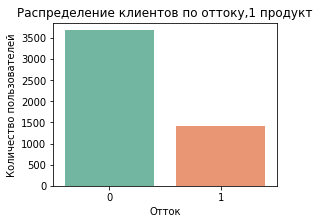

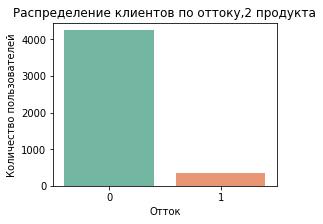

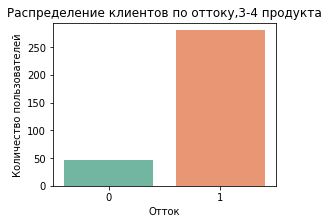

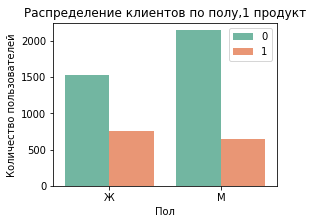

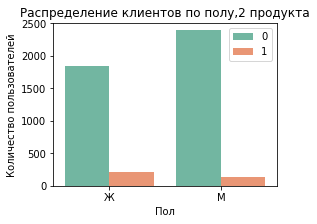

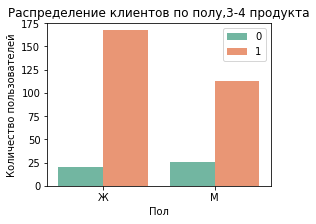

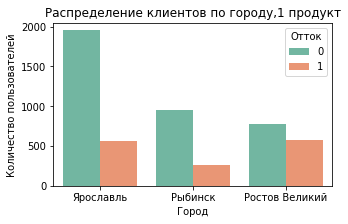

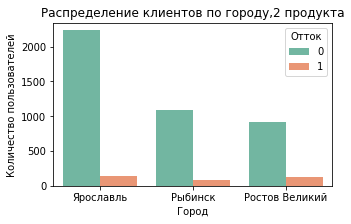

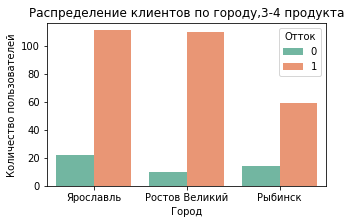

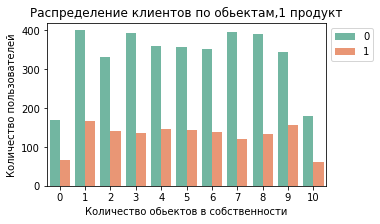

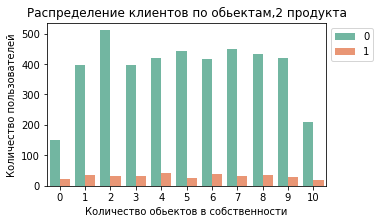

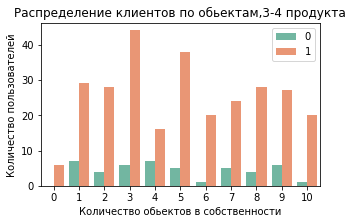

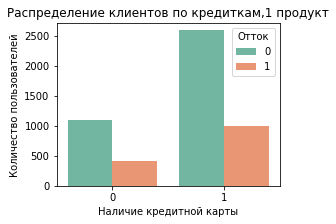

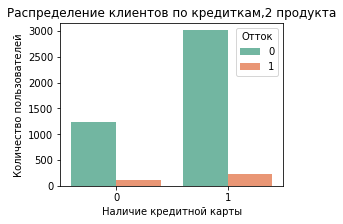

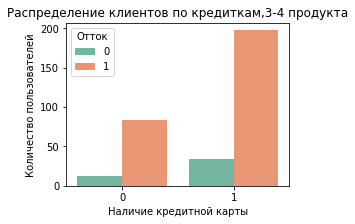

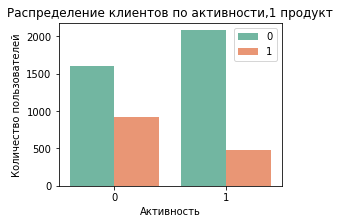

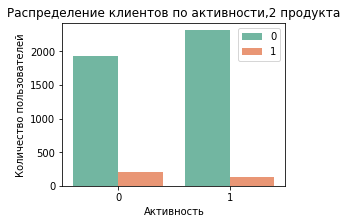

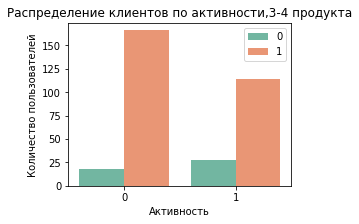

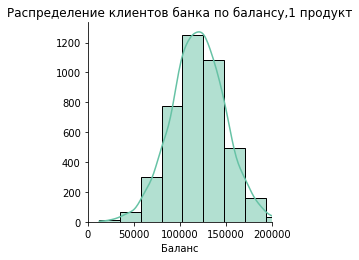

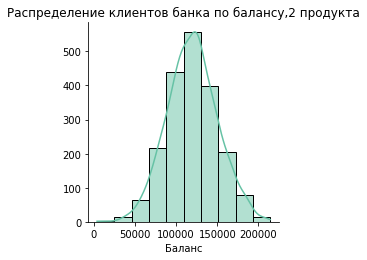

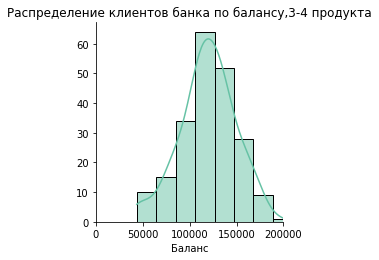

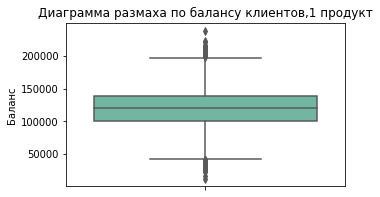

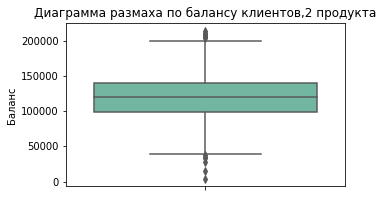

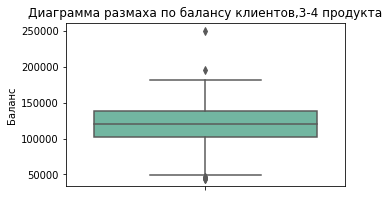

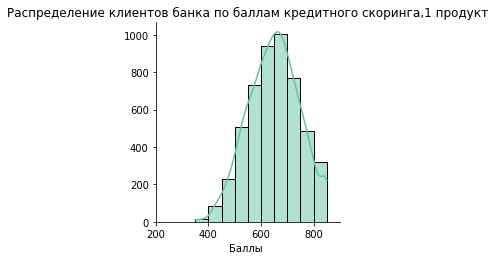

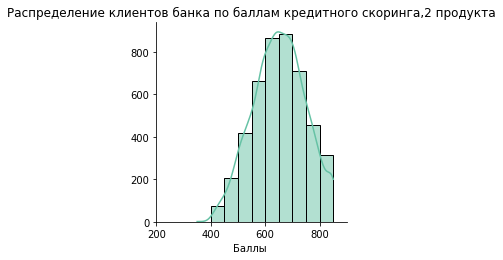

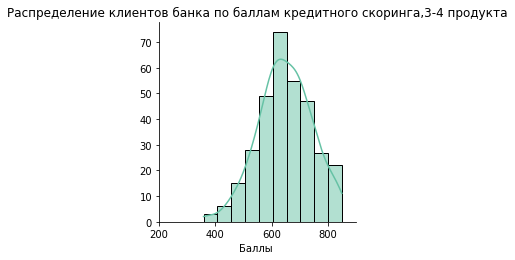

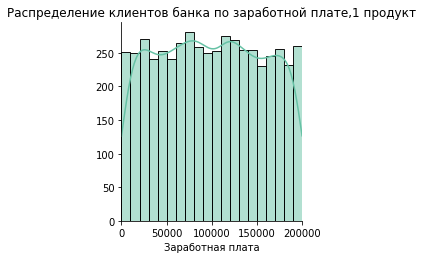

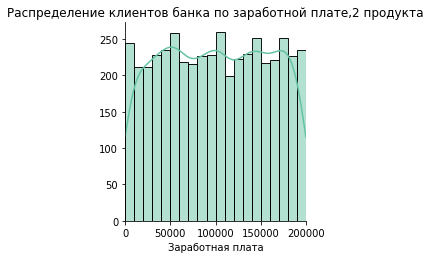

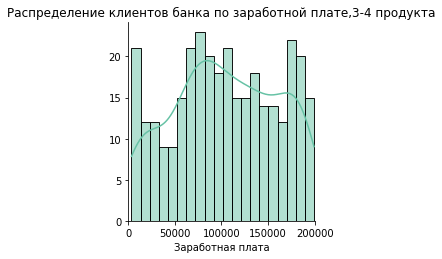

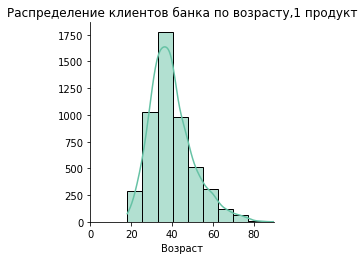

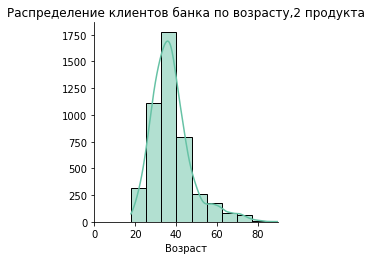

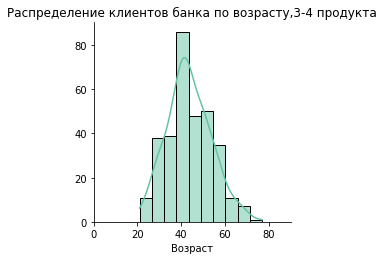

In [62]:
# применим функцию для всех трех категорий

func(data_1,data_2,data_3_and_4)

ВЫВОДЫ ДЛЯ 1 ПРОДУКТА

* БОльшая часть клиентов с одним продуктом остаются верны банку

* БОльшая часть таких клиентов - мужчины

* Наиболее часто клиенты с одним продуктом проживают в Ярославле

* Большинство таких пользователей имеют обьекты в собственности и кредитные карты, также являясь активными клиентами банка

* Клиенты в бОльшей части имеют баланс на счете и и обладают хорошими баллами кредитного скоринга

* Такие пользователи обычно среднего возраста с хорошей заработной платой

ВЫВОДЫ ДЛЯ 2 ПРОДУКТОВ

* Львиная доля клиентов с двумя продуктами банка остаются верны ему и не уходят в отток

* Как и в случае с одним продуктом, бОльшая часть пользователей - мужчины, проживающие в Ярославле

* В основном таких клиенты имеют обьекты в собственности и кредитные карты банка

* Большинство клиентов активны

* БОльшая часть клиентов так же среднего возраста с хорошей заработной платой

ВЫВОДЫ ДЛЯ 3 И 4 ПРОДУКТОВ

* Среди пользователей с 3 и 4 продуктами банка очень высокий процент оттока: в случае с использованием четырех продуктов он вообще стопроцентный

* В данном случае среди пользователей преобладают женщины, чуть старшего возраста, чем в случае 1 и 2 продуктов банка

* Касаемо географической принадлежности, такие клиенты проживают в основном в Ярославле и Ростове Великом

* У большинства таких клентов есть кредитная карта, при этом они не являются активными пользователями банка

# Формулирование и проверка статистических гипотез

Для начала проверим следующую гипотезу:

Гипотеза различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним

Cформулируем нулевую и альтернативную гипотезы:


𝐻0: Доход клиентов, которые пользуются двумя продуктами банка и доход клиентов, которые пользуются одним продуктом банка, одинаковые

𝐻1: Доход клиентов, которые пользуются двумя продуктами банка и доход клиентов, которые пользуются одним продуктом банка, разные



Для начала проверим, насколько распределения выборок близки к нормальным

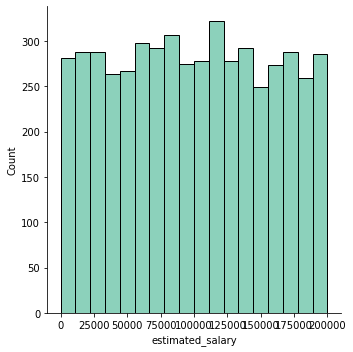

In [63]:
sns.displot(data_1['estimated_salary']);

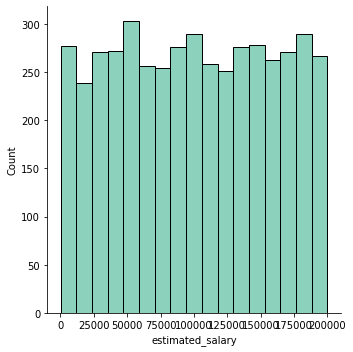

In [64]:
sns.displot(data_2['estimated_salary']);

Для уверенности построим QQ-графики

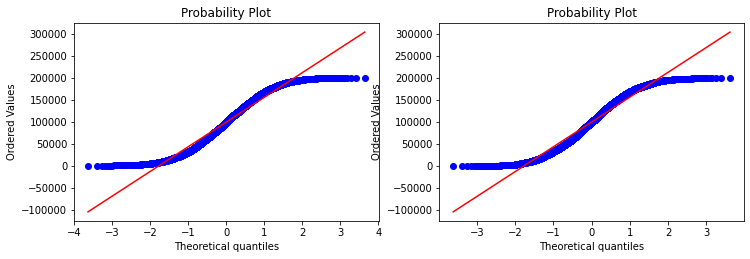

In [65]:
#удостоверимся, что распределение не нормальное

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
st.probplot(data_1['estimated_salary'], dist="norm", plot=plt)
plt.subplot(2,2,2)
st.probplot(data_2['estimated_salary'], dist="norm", plot=plt)
plt.show()

Так как мы видим, что распределения отличаются от нормальных, воспользуемся непараметрическим тестом Манна-Уитни
Если p-value будет меньше выбранного уровня значимости 𝛼=0.05, то нулевую гипотезу о равенстве отвергнем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу

In [66]:
#зададим уровень значимости в 0.05

alpha=0.05

In [67]:
#проведем тест Манна-Уитни

results = st.mannwhitneyu(data_1['estimated_salary'], data_2['estimated_salary'])
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.4079566651927651
Не получилось отвергнуть нулевую гипотезу


По результатам теста Манна-Уитни не получилось отвергнуть нулевую гипотезу о равенстве дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним

Следовательно, мы можем предполагать, что вероятность равенства дохода клиентов, которые пользуются двумя продуктами банка и дохода клиентов, которые пользуются одним продуктом банка, велика

Проверим еще одну гипотезу:

Баланс клиентов, которые пользуются двумя продуктами банка и баланс клиентов, которые пользуются 3 и 4 продуктами банка, одинаковый

Сформулируем нулевую и альтернативную гипотезы:

𝐻0: Баланс клиентов, которые пользуются двумя продуктами банка и баланс клиентов, которые пользуются 3 и 4 продуктами банка, одинаковый

𝐻1: Баланс клиентов, которые пользуются двумя продуктами банка и баланс клиентов, которые пользуются 3 и 4 продуктами банка, разный

Для начала проверим, насколько распределения выборок близки к нормальным



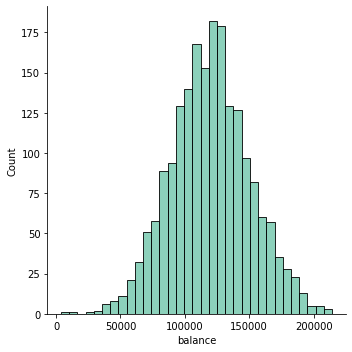

In [68]:
sns.displot(data_2['balance']);

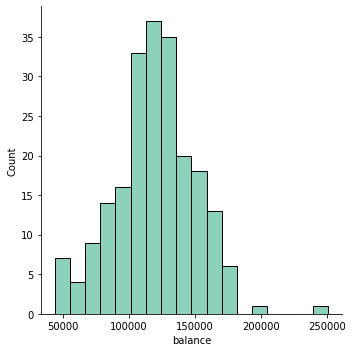

In [69]:
sns.displot(data_3_and_4['balance']);

Для уверенности построим QQ-графики

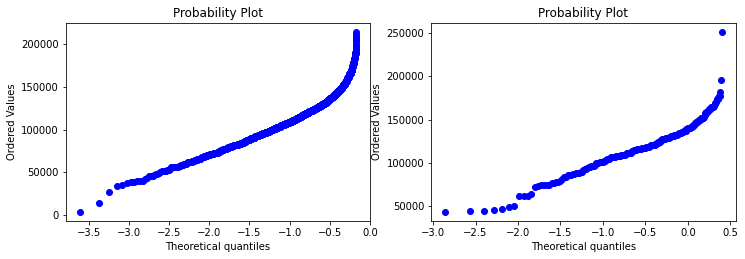

In [70]:
#удостоверимся, что распределение не нормальное

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
st.probplot(data_2['balance'], dist="norm", plot=plt)
plt.subplot(2,2,2)
st.probplot(data_3_and_4['balance'], dist="norm", plot=plt)
plt.show()

Так как мы видим, что распределения отличаются от нормальных, воспользуемся непараметрическим тестом Манна-Уитни Если p-value будет меньше выбранного уровня значимости 𝛼=0.05, то нулевую гипотезу о равенстве средних отвергнем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу

Необходимо отметить следующее: поскольку в балансе присутствуют пропуски, для корректного выполнения теста необходимо указать параметр 'nan_policy' равный 'omit', чтобы тест был осуществлен корректно 
 
 Данный параметр был взят из документации к непараметрическому тесту Манна-Уитни

In [71]:
#зададим уровень значимости в 0.05

alpha=0.05

In [72]:
#проведем тест Манна-Уитни

results = st.mannwhitneyu(data_2['balance'], data_3_and_4['balance'],nan_policy='omit')
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.6915644826789085
Не получилось отвергнуть нулевую гипотезу


По результатам теста Манна-Уитни не получилось отвергнуть нулевую гипотезу о равенстве баланса клиентов, которые пользуются двумя продуктами банка и баланса клиентов, которые пользуются 3 и 4 продуктами банка

Следовательно, мы можем предполагать, что вероятность равенства баланса клиентов, которые пользуются двумя продуктами банка и баланса клиентов, которые пользуются 3 и 4 продуктами банка, велика

Или же так: "весьма велика вероятность того, что баланс клиентов, которые пользуются двумя продуктами банка и баланс клиентов, которые пользуются 3 и 4 продуктами банка, одинаков "

#  ОБЩИЕ ВЫВОДЫ

* В представленных данных присутствуют 10 000 уникальных клиентов из трех городов: Ярославль, Ростов Великий и Рыбинск

* В ходе предобработки данных были заменены названия столбцов датасета, дубликатов обнаружено не было

* Было выявлено большое количество пропусков в столбце с балансом клиентов. При дальнейшем отдельном рассмотрении этих пользователей заметили, что : бОльшая часть таких клиентов мужчины,  живут в Ярославле, среднего возраста и имеют хорошие баллы кредитнго скоринга. Такие пользователи пользуются двумя продуктами банка и имеют кредитные карты. БОльшая часть таких клиентов остаются верны банку и не уходят в отток 

* Вероятно, причиной появления нулевых балансов клиентов в датасете можно считать то, что такие пользователи не имеют дебетовых карт и система считает, что их баланс равен нулю. Возможно, стоит уточнить у разрабочиков или технического отдела, почему так происходит

* В ходе исследовательского анализа данных мы увидели: средний возраст клиентов банка 39 лет, они пользуются от 1 до 4 продуктов банка, в среднем имеют 5 обьектов в собственности и лишь 20 процентов пользователей уходят в отток

* Медианнй возраст клиентов, уходящих в отток, несколько выше чем возраст клиентов, остающихся верными банку

* Клиенты, пользующиеся четыремя продуктами банка, сто процентов уходят в отток. Среди клиентов, остаюшихся верными банку, бОльшая часть пользуется двумя продуктами банка

* БОльшая часть людей, уходящих в отток, является не активными клиентами

* Женщины несколько чаще уходят в отток, нежели мужчины


* Что касается проверки статистических гипотез, то в случае с гипотезой о равенстве дохода клиентов, которые пользуются двумя продуктами банка и дохода клиентов, которые пользуются одним продуктом банка, мы можем предполагать, что вероятность равенства дохода клиентов, которые пользуются двумя продуктами банка и дохода клиентов, которые пользуются одним продуктом банка, велика

* Касаемо второй статистической гипотезы о равенстве баланса клиентов с 2 и 3/4 продуктами банка, в результате проведенного теста можно предположить, что весьма велика вероятность того, что баланс клиентов, которые пользуются двумя продуктами банка и баланс клиентов, которые пользуются 3 и 4 продуктами банка, разный

* Были составлены сегменты пользователей на основе количества потребляемых продуктов: одним продуктом, двумя и тремя/четыремя продуктами банка


КЛИЕНТЫ С 1 ПРОДУКТОМ БАНКА

Клиенты, пользующиеся одним продуктом банка, в основном мужчины среднего возраста, проживающие в Ярославле, остающиеся верными банку, имеющие обьекты недвижимости в собственности, активные, имеющие баланс на счете и кредитные карты

РЕКОМЕНДАЦИИ

Так как основные клиенты данного сегмента мужчины - можно предложить какие-либо интересующие мужское население услуги, например дополнительную страховку, возможно страхование автомобилей

Возможно запустить какую-то рекламу, связанную с мужскими хобби - охотой или рыбалкой

КЛИЕНТЫ С 2 ПРОДУКТАМИ БАНКА
​

Клиенты, пользующиеся одним продуктом банка, в основном мужчины среднего возраста, проживающие в Ярославле, львиная доля которых верна банку, имеющие обьекты недвижимости в собственности, активные, имеющие как очень большой, так и очень низкий баланс на счете,у которых в наличии кредитные карты
​

РЕКОМЕНДАЦИИ
​
Такие клиенты максимально верны банку и не уходят в отток, их все устраивает. Возможно, есть смысл обратить внимание на аномально большой и аномально низкий баланс некоторых клиентов. Вероятно, предложить им услуги вкладов с повышенной ставкой или другие вещи

Так как основная часть клиентов проживает в Ярославле, вероятно можно предложить им какие-либо дополнительные услуги, связанные именно с этим городом: например, оплата проезда с банковской карты или кэшбек на посещения каких-либо заведений.

КЛИЕНТЫ С 3 и 4  ПРОДУКТАМИ БАНКА
​

Клиенты, пользующиеся тремя и четыремя продуктами банка, в основном женщины возраста чуть выше среднего, проживающие в Ярославле и Ростове Великом, львиная доля которых уходит в отток , имеющие обьекты недвижимости в собственности, неактивные, имеющие как очень большой, так и очень низкий баланс на счете,у которых в наличии кредитные карты
​

РЕКОМЕНДАЦИИ
​

Такие клиенты довольно редко верны банку, уходят в отток, их очевидно что-то не устраивает. Возможно, есть смысл обратить внимание на женскую аудиторию, предложить им какие-либо сугубо женские активности. Так же обратить внимание на Ярославль и Ростов Велкий, возможно открыть дополнительные отделения банка там.

Так как большинство клиентов не активные, вероятно можно их каким-то образом простимулировать, к примеру запустить новую рекламу или провести какие-либо промоакции, обьявить кэшбек на популярные в этом городе магазины или рестораны